# Fundamental ML models for classification

### Load the Dataset
 
First, we load the dataset.


In [2]:
from chelo import DatasetRegistry
dataset = DatasetRegistry.get_dataset("AmesMutagenicityDataset")
dataset.load_data()
X, y = dataset.to_numpy()
y = y.ravel()

### Scale and preprocess the data

Machine learning models often perform better when data is scaled, especially algorithms  which are sensitive to the magnitude of input features.

Scaling ensures all features contribute equally to the model and prevents algorithms from being biased toward features with larger numerical ranges.

Furthermore, before we train the models, we split the data into training and test sets.






In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Note that we need to separately scale the train and test set!

### ML models

Let's start by training a logistic regression model (more on this later):

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")

Logistic Regression Accuracy: 0.66


What about a support vector machine?

In [5]:
from sklearn.svm import SVC

# Train SVM with a radial basis function (RBF) kernel
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.70


or a random forest?

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Scaling not strictly needed for Random Forest

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.74


or KNN?

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_knn = knn_model.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.71


or gradient boosting?

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")

Gradient Boosting Accuracy: 0.72


Tuning the hyper-parameters of a models can lead to  improvements:

In [9]:
from sklearn.svm import SVC

# Train SVM with a radial basis function (RBF) kernel
svm_model = SVC(kernel="rbf", random_state=42, gamma=1, C=10)
svm_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

SVM Accuracy: 0.73


### Examining the predictions

In [10]:
y_pred = svm_model.predict(X_test)
for i in range(10):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 1
Predicted: 0, Actual: 0
Predicted: 0, Actual: 1


For models that support  probabilistic predictions we can also get these estimates:

In [11]:
y_pred_proba = rf_model.predict_proba(X_test)

for i in range(5):
    print(f"Instance {i + 1} - Predicted Probabilities: {y_pred_proba[i]}")

Instance 1 - Predicted Probabilities: [0.74 0.26]
Instance 2 - Predicted Probabilities: [0.52 0.48]
Instance 3 - Predicted Probabilities: [0.66 0.34]
Instance 4 - Predicted Probabilities: [0.76 0.24]
Instance 5 - Predicted Probabilities: [0.82 0.18]


We can also examine the decision surface of different models:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_surface(model, X, y):
    """
    Plots the decision surface for a two-class classification model.
    
    Parameters:
        model: Trained classification model (must support `fit` and `predict` methods)
        X: Feature matrix (2D, two features only)
        y: Target array (binary labels, 0 or 1)
    """
    # Create a mesh grid for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))
    
    # Fit the model and predict on the mesh grid
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision surface
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Plot the original data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", marker="o", cmap=plt.cm.coolwarm)

    # Add a legend for the two classes
    handles, labels = scatter.legend_elements()
    plt.legend(handles, ['Class 0', 'Class 1'], title="True Classes")

    # Label the axes and title
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Surface")
    plt.show()
    

Logistic Regression:

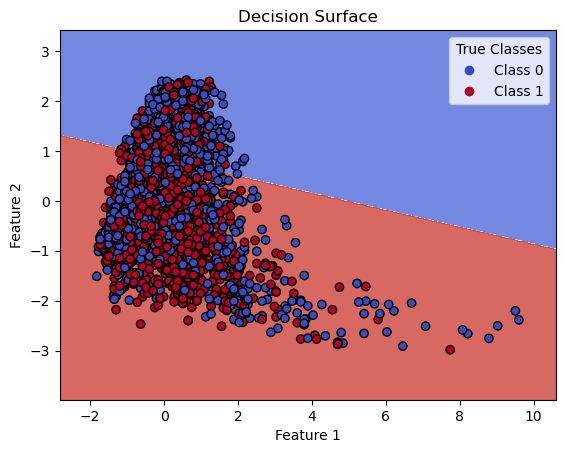

In [13]:
plot_surface(LogisticRegression(), X_train_scaled[:, [0, 1]], y_train)

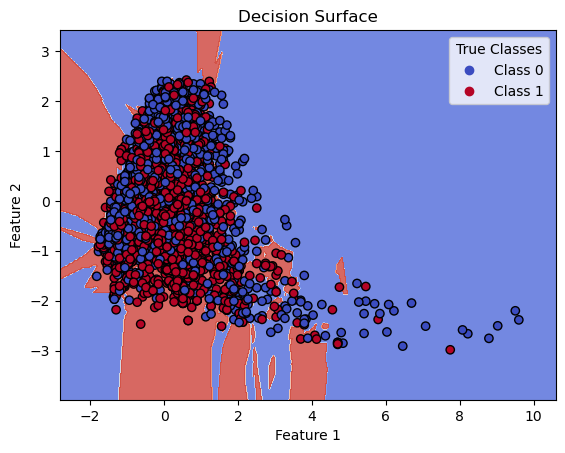

In [14]:
plot_surface(KNeighborsClassifier(), X_train_scaled[:, [0, 1]], y_train)


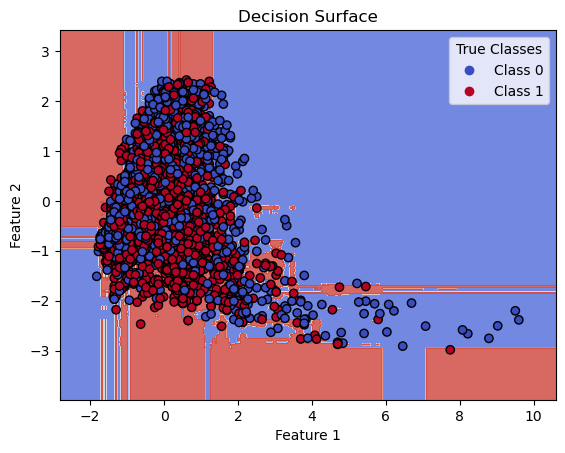

In [15]:
plot_surface( RandomForestClassifier(n_estimators=100, random_state=42), X_train_scaled[:, [0, 1]], y_train)


What about using other features?

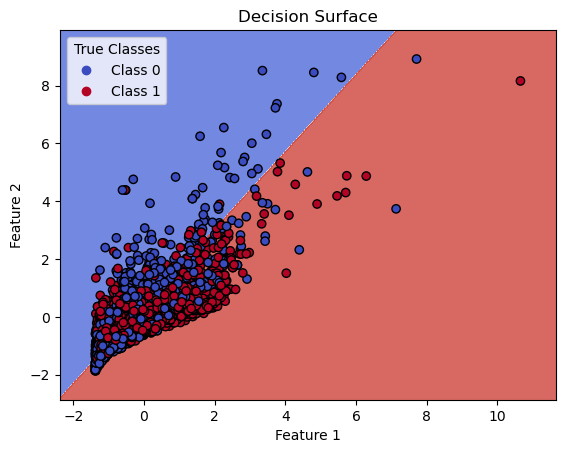

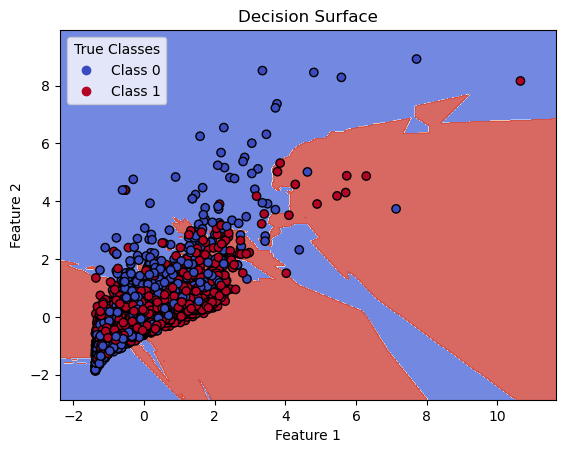

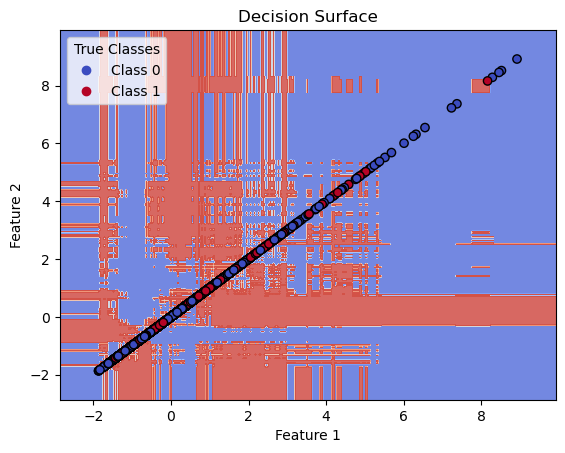

In [16]:
plot_surface(LogisticRegression(), X_train_scaled[:, [5, 6]], y_train)
plot_surface(KNeighborsClassifier(), X_train_scaled[:, [5, 6]], y_train)
plot_surface( RandomForestClassifier(n_estimators=100, random_state=42), X_train_scaled[:, [6, 6]], y_train)


What about evaluating the performance of the models?


Several metrics exist. For example:
- Accuracy: The ratio of correctly predicted instances to the total instances. It is simple but may not be suitable for imbalanced datasets.
- Precision: The proportion of true positive predictions among all positive predictions, measuring the model's reliability in identifying positive classes.
- Recall (Sensitivity): The proportion of actual positive instances correctly predicted by the model, useful for imbalanced data where capturing all positives is crucial.
- F1-Score: The harmonic mean of precision and recall, providing a balanced metric for datasets with uneven class distributions.
- Confusion Matrix: A matrix summarizing true positives, true negatives, false positives, and false negatives, providing detailed insights into model predictions.

All of them can be easily calculated using scikit-learn:

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize and train the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

# Precision
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
print(f"KNN Precision: {precision_knn:.2f}")

# Recall
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print(f"KNN Recall: {recall_knn:.2f}")

# F1-Score
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print(f"KNN F1-Score: {f1_knn:.2f}")

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)

# Classification Report (summary of metrics for each class)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.67
KNN Precision: 0.70
KNN Recall: 0.67
KNN F1-Score: 0.66
Confusion Matrix:
[[407  96]
 [289 361]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.81      0.68       503
           1       0.79      0.56      0.65       650

    accuracy                           0.67      1153
   macro avg       0.69      0.68      0.67      1153
weighted avg       0.70      0.67      0.66      1153

